# New York City Taxi Trip Duration Prediction

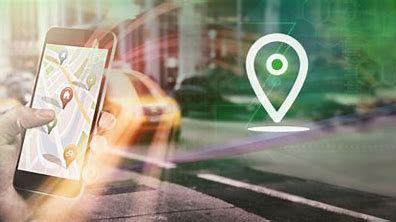

# Overview

At some point or the other almost each one of us has used an Uber for taking a ride. Ride hailing services are services that use online-enabled platforms to connect between passengers and local drivers using their personal vehicles. In most cases they are a comfortable method for door-to-door transport. Usually they are cheaper than using licensed taxicabs. Examples of ride hailing services include Uber and Bolt.

To improve the efficiency of taxi dispatching systems for such services, it is important to be able to predict how long a driver will have his taxi occupied. If a dispatcher knew approximately when a taxi driver would be ending their current ride, they would be better able to identify which driver to assign to each pickup request.

__The aim of this project is to predict the total ride duration of taxi trips in New York City.__

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we will import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [3]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section we will load the data from the `train` file into a DataFrame. |

---

In [6]:
# reading the data
df = pd.read_csv('nyc_taxi_trip_duration.csv')

In [7]:
# first five rows of the data
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [8]:
# Last five rows of the data
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [9]:
# columns in the dataset
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

## Description of the variables


<b>id</b> : a unique identifier for each trip. This is a <b>nominal</b> data column.

<b>vendor_id</b> :  a code indicating the provider associated with the trip record.This is a <b>nominal</b> data column.

<b>pickup_datetime</b> : the date and the time when the ride started.

<b>dropoff_datetime</b> : the date and time when the ride ended

<b>passenger_count</b> : the number of passengers in the vehicle (driver entered value)

<b>pickup_longitude</b> : date and time when the meter was engaged

<b>pickup_latitude</b> : date and time when the meter was disengaged

<b>dropoff_longitude</b> : the longitude where the meter was disengaged

<b>dropoff_latitude</b> : the latitude where the meter was disengaged

<b>store_and_fwd_flag</b> : This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip).This column is categorical

<b>trip_duration</b> :  (target) duration of the trip in seconds

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---

In [10]:
# shape of the data
df.shape

(729322, 11)

There are approximately 730 thousands records in our dataset.

In [11]:
# Check count of unique id's in the dataset
print("There are %d unique id's in Training dataset, which is equal to the number of records"%(df.id.nunique()))

There are 729322 unique id's in Training dataset, which is equal to the number of records


Now let's take a look at the data types in the dataset using df.info() to get more information about the dataset.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


By looking at the results above, it seems as if there are no null values. But lets double check, just to be sure.

In [14]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

As expected there are no null values on our dataset, which means there is no need for data imputation.

In [16]:
# statistics of the numerical features in the data
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [17]:
# looking at the longest trips
print('Longest 5 trip duration: \n {} '.format(data['trip_duration'].nlargest(5)))
print('\nThe the number of rows with 0 as their trip duration values is {}'.format(len(data[data['trip_duration']==1 ])))

Longest 5 trip duration: 
 21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
Name: trip_duration, dtype: int64 

The the number of rows with 0 as their trip duration values is 13


In [10]:
# There is 1 record with extremely large value of 1939736 and 13 with 0 seconds each. We can drop these rows. 

In [11]:
# dropping the outliers
data=data[data.trip_duration!=data.trip_duration.max()]
data=data[data.trip_duration!=data.trip_duration.min()]

In [12]:
# converting the date time variables to datatime format
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [13]:
# creating datetime features
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()
data['pickup_month']=data['pickup_datetime'].dt.month
data['dropoff_month']=data['dropoff_datetime'].dt.month

In [14]:
# columns of the data
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
       'dropoff_month'],
      dtype='object')

In [15]:
# dropping the variables which might not be helpful to predict the trip duration
data = data.drop(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude'], axis=1)

In [16]:
# converting the categorical variables to numerical variables
data = pd.get_dummies(data)

In [17]:
# separating dependent and independent variables
X = data.drop(['trip_duration'], 1)
y = data['trip_duration']

In [18]:
# creating a training and validation set
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25, random_state=10)

## Linear Regression Model

In [19]:
# creating the model
lreg = LinearRegression()

In [20]:
# training the model
lreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
# rmse on training set
pred_train = lreg.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
rmse_train

3107.261767998848

In [22]:
# rmse on validation set
pred_val = lreg.predict(x_valid)
rmse = np.sqrt(mean_squared_error(y_valid, pred_val))
rmse

3114.5711014235185